In [0]:
import pandas as pd                                               #imported the required libraries
import numpy as np
import matplotlib.pyplot as plt
import random

In [0]:
data=pd.read_csv("sample_data/california_housing_train.csv")       #loading the data

In [0]:
data.corr()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


In [0]:
features=data[["median_income","total_bedrooms"]] 

In [0]:
target=data["median_house_value"]

In [0]:
target.shape

(17000,)

In [0]:
features=np.array(features)
target=np.array(target)

In [0]:
features=features/features.max()
target=target/target.max()

In [0]:
def curve(m,x,c):
  temp= m[0]*x.T[0]+m[1]*(x.T[1]**2) +c
  temp=np.array(temp)
  temp=np.reshape(temp,(1,len(temp)))
  return temp
def error(m,x,c,y):
  return np.mean(curve(m,x,c)-y)**2


def intercepts(m,x,c,y):
  return 2*np.mean(curve(m,x,c)-y)
def accuracy_pred(error,y):
  currenterror=error(m,features,c,target)
  arrow=(currenterror/np.mean(y**2))*100
  return 100-arrow

In [0]:
def derivative_slope_1(m,x,c,y):
  return 2*np.mean((curve(m,x,c)-y)*x.T[0]**1)
def derivative_slope_2(m,x,c,y):
  return 2*np.mean((curve(m,x,c)-y)*x.T[1]**2)

In [0]:
target=np.array(target)
target=np.reshape(target,(1,len(target)))
target.shape

(1, 17000)

m [0.97355458 0.77184659]
c 0.5422675552036161
error: 0.018758277444856516
accuracy: 91.68882776957636


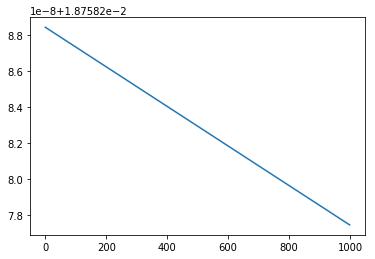

In [0]:
from IPython.display import clear_output
m=[random.random(),random.random()]
c=random.random()
cost=[]
lr=0.00000001
for i in range(0,1000):
  m=m-lr*derivative_slope_1(m,features,c,target)
  c=c-lr*derivative_slope_2(m,features,c,target)
  cost.append(error(m,features,c,target))
  clear_output(True)
print("m",m)
print("c",c)
print("error:",error(m,features,c,target))
print("accuracy:",accuracy_pred(error,target))
plt.plot(cost)
plt.show()